In [9]:
# PROJECT: Use Wisconsin Breast Cancer dataset to implement a Linear Regression Model

# Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
#   -- -----------------------------------------
#   1. Sample code number            id number
#   2. Clump Thickness               1 - 10
#   3. Uniformity of Cell Size       1 - 10
#   4. Uniformity of Cell Shape      1 - 10
#   5. Marginal Adhesion             1 - 10
#   6. Single Epithelial Cell Size   1 - 10
#   7. Bare Nuclei                   1 - 10
#   8. Bland Chromatin               1 - 10
#   9. Normal Nucleoli               1 - 10
#  10. Mitoses                       1 - 10
#  11. Class:                        (2 for benign, 4 for malignant)


In [10]:
# Import Packages  
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [11]:
# Load Dataset
cancer_data = pd.read_csv("../data/breast-cancer-wisconsin.data", header=None)

#print(cancer_data.count())


In [12]:
# Preprocess Data

# missing data in column 6 is marked with '?' these rows are removed from the dataset
cancer_data = cancer_data[cancer_data[6] != '?']

#print(cancer_data.count())

# Divide data into input/output
X = cancer_data.iloc[:,1:10]
y = cancer_data.iloc[:,10]


# Divide data into training/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#print(X_train.count())
#print(X_test.count())


In [13]:
# Train Model
lm = LinearRegression()
lm.fit(X_train, y_train)

#print('Coefficients: \n', lm.coef_)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# Test the Model
y_pred = [int(2) if item < 3 else int(4) for item in lm.predict(X_test)]
y_test = y_test.tolist()


In [15]:
# Compute Results

# Compute confussion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

TN = sum([1 for i in range(len(y_test)) if y_test[i] == 2 and y_pred[i] == 2])
TP = sum([1 for i in range(len(y_test)) if y_test[i] == 4 and y_pred[i] == 4])
FP = sum([1 for i in range(len(y_test)) if y_test[i] == 2 and y_pred[i] == 4])
FN = sum([1 for i in range(len(y_test)) if y_test[i] == 4 and y_pred[i] == 2])

total = len(y_test)
actual_yes = sum([1 for i in range(len(y_test)) if y_test[i] == 4])
actual_no = sum([1 for i in range(len(y_test)) if y_test[i] == 2])
pred_yes = sum([1 for i in range(len(y_pred)) if y_pred[i] == 4])
pred_no = sum([1 for i in range(len(y_pred)) if y_pred[i] == 2])

# Accuracy
accuracy = round((TP + TN)/total,4)

# Misclassification Rate: Overall, how often is it wrong?
misc_rate = round((FP+FN)/total,4)

# True Positive Rate: When it's actually yes, how often does it predict yes?
TP_rate = round(TP/actual_yes,4)

# False Positive Rate: When it's actually no, how often does it predict yes?
FP_rate = round(FP/actual_no,4)

# Specificity: When it's actually no, how often does it predict no? equivalent to 1 minus False Positive Rate
specificity = round(TN/actual_no,4)

# Precision: When it predicts yes, how often is it correct?
precission = round(TP/pred_yes,4)

# Prevalence: How often does the yes condition actually occur in our sample?
prevalence = round(actual_yes/total,4)


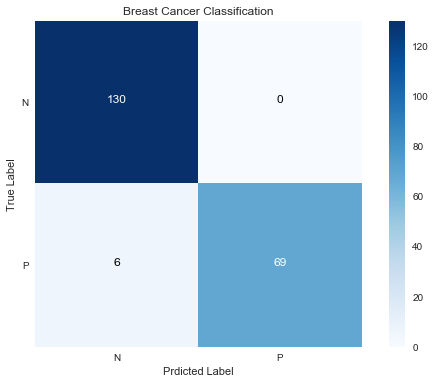

Total Cases -> 205
Total Positive Cases -> 75
Total Negative Cases -> 130
Accuracy -> 0.9707
Misclassification Rate: Overall, how often is it wrong? -> 0.0293
True Positive Rate: When its actually yes, how often does it predict yes? -> 0.92
False Positive Rate: When its actually no, how often does it predict yes? -> 0.0
Specificity: When its actually no, how often does it predict no? equivalent to 1 minus False Positive Rate -> 1.0
Prevalence: How often does the yes condition actually occur in our sample? -> 0.3659


In [16]:
# Display Results
np.set_printoptions(precision=2)

plt.figure()
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Breast Cancer Classification')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['N', 'P'])
plt.yticks(tick_marks, ['N', 'P'])

for i, j in it.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])) :
    plt.text(j,i,cnf_matrix[i][j], horizontalalignment="center", color="white" if cnf_matrix[i,j] > cnf_matrix.max()/2 else "black")

plt.ylabel('True Label')
plt.xlabel('Prdicted Label')
plt.tight_layout()
plt.grid('off')
plt.show()

# Print results
print('Total Cases ->', len(y_test))
print('Total Positive Cases ->', actual_yes)
print('Total Negative Cases ->', actual_no)
print('Accuracy ->', accuracy)
print('Misclassification Rate: Overall, how often is it wrong? ->', misc_rate)
print('True Positive Rate: When its actually yes, how often does it predict yes? ->', TP_rate)
print('False Positive Rate: When its actually no, how often does it predict yes? ->', FP_rate)
print('Specificity: When its actually no, how often does it predict no? equivalent to 1 minus False Positive Rate ->', specificity)
print('Prevalence: How often does the yes condition actually occur in our sample? ->', prevalence)
